In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('used-bikes.csv')
df.head()

,Summary,url,Title,Post_Details,Bike Type,Brand,Trim/Edition,Model,Year,Mileage,Seller,Capacity,Price
0,"Atv beach bike 201435,000 kmKegalle, Motorbike...",https://ikman.lk/en/ad/atv-beach-bike-2014-for...,Atv beach bike 2014,"Posted on 30 Jan 9:02 am, Kegalle City, Kegalle",Quadricycles,Other brand,Atv beach bike,Other model,2014,"35,000 km",lakee,150 cc,"Rs 440,000"
1,"Bajaj Pulsar 150 palsar 201450,737 kmAnuradhap...",https://ikman.lk/en/ad/bajaj-pulsar-150-palsar...,Bajaj Pulsar 150 palsar 2014,"Posted on 11 Mar 1:58 pm, Kekirawa, Anuradhapura",Motorbikes,Bajaj,palsar 150,Pulsar 150,2014,"50,737 km",Sasila Ishan,150 cc,"Rs 370,000"
2,"Beach Buggy 20055,000 kmColombo, MotorbikesRs ...",https://ikman.lk/en/ad/beach-buggy-2005-for-sa...,Beach Buggy 2005,"Posted on 21 Jan 9:45 pm, Talawatugoda, Colombo",Quadricycles,Other brand,Beach Buggy,Other model,2005,"5,000 km",vinuka automart,125 cc,"Rs 210,000"
3,"Electra Alpha Vino 2019600 kmColombo, Motorbik...",https://ikman.lk/en/ad/electra-alfa-vino-2019-...,Electra Alpha Vino 2019,"Posted on 22 Feb 2:26 pm, Moratuwa, Colombo",E-bikes,Electra,Vino,Alpha,2019,600 km,Jeewantha Basnayaka,49 cc,"Rs 105,000"
4,"Hero Maestro Edge 201818,500 kmMEMBERKalutara,...",https://ikman.lk/en/ad/hero-maestro-edge-2018-...,Hero Maestro Edge 2018,"Posted on 07 Mar 2:08 pm, Bandaragama, Kalutara",Scooters,Hero,2018,Maestro Edge,2018,"18,500 km",Anjalee Motors,110 cc,"Rs 80,000"


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Summary       5016 non-null   object
 1   url           5016 non-null   object
 2   Title         5016 non-null   object
 3   Post_Details  5016 non-null   object
 4   Bike Type     5016 non-null   object
 5   Brand         5016 non-null   object
 6   Trim/Edition  3815 non-null   object
 7   Model         5016 non-null   object
 8   Year          5016 non-null   int64 
 9   Mileage       5016 non-null   object
 10  Seller        5013 non-null   object
 11  Capacity      5016 non-null   object
 12  Price         5016 non-null   object
dtypes: int64(1), object(12)
memory usage: 509.6+ KB


Summary            0
url                0
Title              0
Post_Details       0
Bike Type          0
Brand              0
Trim/Edition    1201
Model              0
Year               0
Mileage            0
Seller             3
Capacity           0
Price              0
dtype: int64

In [4]:
df.drop(columns=['Summary', 'url', 'Post_Details', 'Title'], inplace=True)


In [5]:
df['Trim/Edition'] = df['Trim/Edition'].fillna('Unknown')


In [6]:
df['Seller'] = df['Seller'].fillna('Unknown')


In [7]:
df['Price'] = df['Price'].replace('[Rs,]', '', regex=True)
df['Price'] = df['Price'].replace(',', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [8]:
df['Mileage'] = df['Mileage'].str.replace(',', '')
df['Mileage'] = df['Mileage'].str.extract('(\d+)', expand=False)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

In [9]:
df['Capacity'] = df['Capacity'].str.extract('(\d+)', expand=False)
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')


In [10]:
df['Brand'] = df['Brand'].str.strip().str.title()
df['Model'] = df['Model'].str.strip().str.title()
df['Bike Type'] = df['Bike Type'].str.strip().str.title()


In [11]:
df.drop_duplicates(inplace=True)


In [12]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5015
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bike Type     5000 non-null   object
 1   Brand         5000 non-null   object
 2   Trim/Edition  5000 non-null   object
 3   Model         5000 non-null   object
 4   Year          5000 non-null   int64 
 5   Mileage       5000 non-null   int64 
 6   Seller        5000 non-null   object
 7   Capacity      5000 non-null   int64 
 8   Price         5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 390.6+ KB


,Year,Mileage,Capacity,Price
count,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2013.226000,45299.790800,132.519800,3.162096e+05
std,7.372557,63978.300745,44.451866,2.356844e+05
min,1923.000000,75.000000,1.000000,1.700000e+04
25%,2011.000000,20000.000000,110.000000,1.500000e+05
50%,2016.000000,32363.000000,125.000000,2.550000e+05
75%,2018.000000,50000.000000,150.000000,4.400000e+05
max,2022.000000,950000.000000,749.000000,2.500000e+06


In [13]:
df = df[df['Year'] >= 2000]


In [14]:
df = df[df['Mileage'] <= 300000]


<Axes: title={'center': 'Top 10 Most Listed Bike Brands'}, ylabel='Brand'>

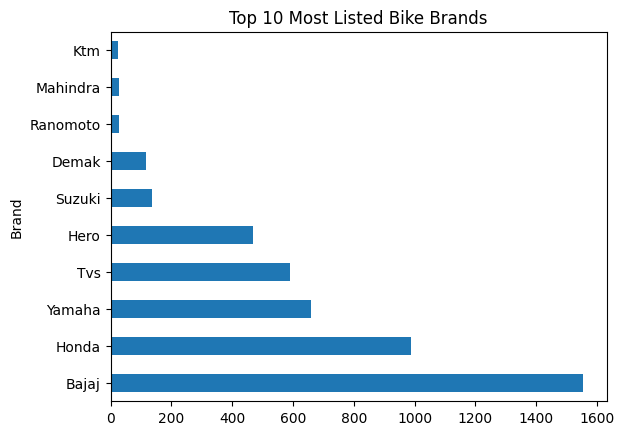

In [15]:
df['Brand'].value_counts().head(10).plot(kind='barh', title='Top 10 Most Listed Bike Brands')


<Axes: title={'center': 'Avg Price by Brand'}, xlabel='Brand'>

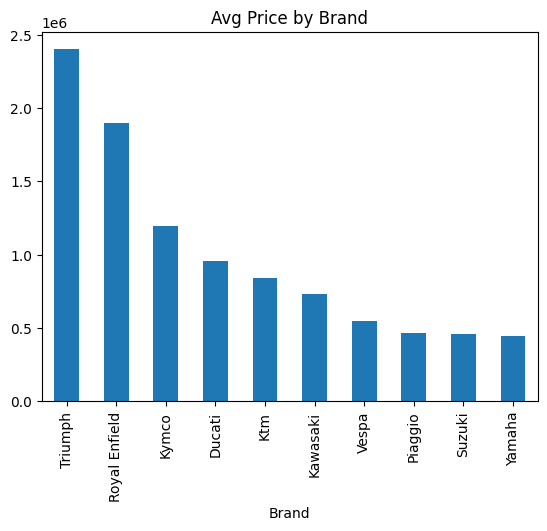

In [16]:
df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar', title='Avg Price by Brand')


<Axes: title={'center': 'Distribution of Bike Types'}, ylabel='count'>

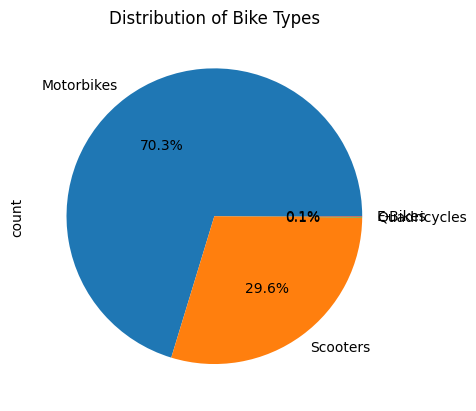

In [17]:
df['Bike Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Bike Types')


<Axes: xlabel='Year', ylabel='Price'>

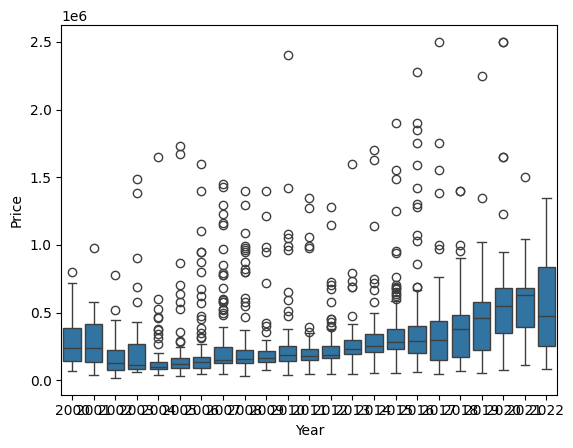

In [18]:
import seaborn as sns
sns.boxplot(data=df, x='Year', y='Price')


<Axes: title={'center': 'Mileage Distribution'}, ylabel='Frequency'>

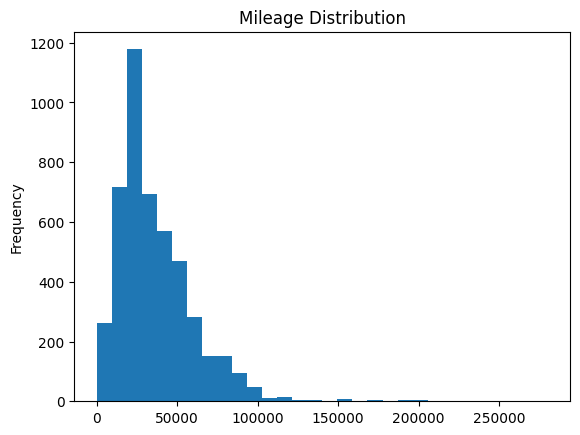

In [19]:
df['Mileage'].plot(kind='hist', bins=30, title='Mileage Distribution')


<Axes: xlabel='Capacity', ylabel='Price'>

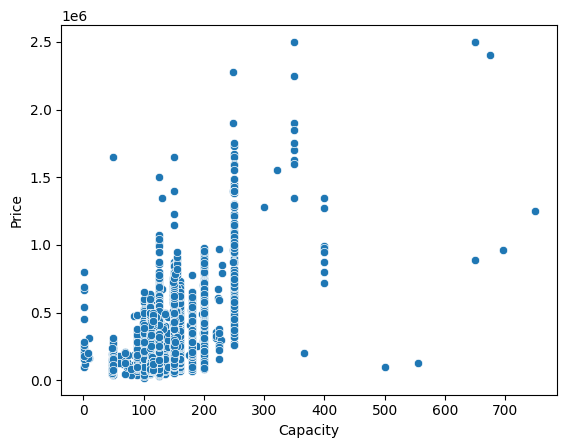

In [20]:
sns.scatterplot(data=df, x='Capacity', y='Price')


In [22]:
# Convert columns to string first to ensure .str methods work
df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)
df['Capacity'] = df['Capacity'].astype(str).str.extract('(\d+)').astype(float)
df['Price'] = df['Price'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)


In [23]:
# Drop rows with unrealistic values
df = df[(df['Year'] >= 2000) & (df['Mileage'] <= 300000) & (df['Price'] < 1500000)]


In [24]:
df = df.dropna(subset=['Trim/Edition', 'Seller'])  # if needed


In [25]:
df.to_csv('cleaned_bike_data.csv', index=False)


In [26]:
# Strip spaces and fix case (e.g., capitalize properly)
for col in ['Bike Type', 'Brand', 'Trim/Edition', 'Model', 'Seller']:
    df[col] = df[col].astype(str).str.strip().str.title()


In [27]:
# Replace placeholders with NaN (e.g. '.' or 'Unknown')
df.replace({'.': pd.NA, 'Unknown': pd.NA, 'Nan': pd.NA, 'Na': pd.NA}, inplace=True)


In [28]:
num_cols = ['Year', 'Mileage', 'Capacity', 'Price']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [29]:
# For example, fill missing numeric data with median or drop rows with important missing info
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df.dropna(subset=['Price', 'Year'], inplace=True)  # drop rows without price or year


In [30]:
# For example, remove exact duplicates
df.drop_duplicates(inplace=True)


In [31]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 5014
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bike Type     4656 non-null   object 
 1   Brand         4656 non-null   object 
 2   Trim/Edition  3394 non-null   object 
 3   Model         4656 non-null   object 
 4   Year          4656 non-null   int64  
 5   Mileage       4656 non-null   float64
 6   Seller        4653 non-null   object 
 7   Capacity      4656 non-null   float64
 8   Price         4656 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 363.8+ KB


,Bike Type,Brand,Trim/Edition,Model,Year,Mileage,Seller,Capacity,Price
0,Quadricycles,Other Brand,Atv Beach Bike,Other Model,2014,35000.0,Lakee,150.0,440000.0
1,Motorbikes,Bajaj,Palsar 150,Pulsar 150,2014,50737.0,Sasila Ishan,150.0,370000.0
2,Quadricycles,Other Brand,Beach Buggy,Other Model,2005,5000.0,Vinuka Automart,125.0,210000.0
3,E-Bikes,Electra,Vino,Alpha,2019,600.0,Jeewantha Basnayaka,49.0,105000.0
4,Scooters,Hero,2018,Maestro Edge,2018,18500.0,Anjalee Motors,110.0,80000.0


In [32]:
df['Trim/Edition'] = df['Trim/Edition'].fillna('Unknown')


In [33]:
df['Seller'] = df['Seller'].fillna('Unknown')
# OR
# df = df.dropna(subset=['Seller'])


In [34]:
text_cols = ['Bike Type', 'Brand', 'Trim/Edition', 'Model', 'Seller']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()  # Capitalizes first letters, removes spaces


In [35]:
print(f"Duplicates before: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicates after: {df.duplicated().sum()}")


Duplicates before: 0
Duplicates after: 0


In [36]:
print(df[(df['Mileage'] < 0) | (df['Price'] < 0)])
# If any rows appear here, investigate and remove/fix if needed


Empty DataFrame
Columns: [Bike Type, Brand, Trim/Edition, Model, Year, Mileage, Seller, Capacity, Price]
Index: []


In [37]:
df = df.reset_index(drop=True)


In [38]:
df.to_csv('cleaned_bike_data.csv', index=False)


In [39]:
df.to_csv('cleaned_bike_data2.csv', index=False)


In [40]:
df.duplicated().sum()


np.int64(0)